In [22]:
#Importación de librerías
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 90)

In [24]:
# CWD = Current Working Directory
cwd = os.getcwd()
raw_dir = cwd + "/../data/raw/"
processed_dir = cwd + "/../data/processed/"
grph_dir = cwd + "/../graphs/"

In [3]:
df = pd.read_csv(processed_dir + 'datos_limpios.csv')

In [4]:
df

,ESTU_TIENEETNIA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENESERVICIOTV,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_SITUACIONECONOMICA,COLE_JORNADA,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,ESTU_PRIVADO_LIBERTAD,PUNT_MATEMATICAS,DESEMP_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_C_NATURALES,DESEMP_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,SEMESTRE
0,Si,Técnica o tecnológica completa,Técnica o tecnológica completa,Estrato 1,3 a 4,Dos,Si,Si,Si,Si,Si,No,Si,No,26 A 100 LIBROS,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Igual,MAÑANA,MIXTO,NO OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,N,72,4,97,68.0,90.0,B1,67,3,95,76,4,100,69,3,97,354,98.0,56.170674,3.0,2.0,2022-2
1,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Estrato 4,1 a 2,Uno,No,Si,Si,No,No,No,No,No,26 A 100 LIBROS,Entre 1 y 2 horas,Entre 30 y 60 minutos,Menos de 10 horas,1 o 2 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como personal de limpieza, mantenimien...",Peor,MAÑANA,MIXTO,NO OFICIAL,A,S,ACADÉMICO,S,URBANO,N,72,4,97,75.0,96.0,B1,67,3,95,70,4,95,66,3,94,346,97.0,46.545809,2.0,3.0,2022-2
2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Sin Estrato,7 a 8,Seis o mas,Si,No,Si,No,No,No,No,No,11 A 25 LIBROS,Entre 1 y 2 horas,Más de 3 horas,Más de 30 horas,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,Mejor,MAÑANA,MIXTO,OFICIAL,A,N,ACADÉMICO,N,RURAL,N,30,1,5,32.0,4.0,A-,39,1,18,37,2,9,35,1,15,175,6.0,47.293140,2.0,2.0,2022-2
3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,3 a 4,Dos,No,No,No,No,Si,Si,Si,No,0 A 10 LIBROS,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,1 o 2 veces por semana,Nunca o rara vez comemos eso,3 a 5 veces por semana,No sabe,"Trabaja en el hogar, no trabaja o estudia",Mejor,MAÑANA,MIXTO,OFICIAL,A,N,TÉCNICO,S,URBANO,N,30,1,5,34.0,9.0,A-,37,1,13,37,2,8,37,1,22,176,7.0,43.190455,2.0,2.0,2022-2
4,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,3 a 4,Dos,Si,Si,No,No,Si,No,No,No,11 A 25 LIBROS,Entre 1 y 2 horas,Más de 3 horas,0,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja en el hogar, no trabaja o estudia",Igual,MAÑANA,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,N,29,1,4,40.0,28.0,A-,31,1,2,44,2,24,38,1,24,179,8.0,52.126657,3.0,3.0,2022-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126268,No,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 3,3 a 4,Cuatro,Si,Si,Si,Si,Si,Si,No,Si,11 A 25 LIBROS,No leo por entretenimiento,Entre 30 y 60 minutos,0,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Pensionado,"Trabaja en el hogar, no tr

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126273 entries, 0 to 126272
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIENEETNIA                126273 non-null  object 
 1   FAMI_EDUCACIONPADRE            126273 non-null  object 
 2   FAMI_EDUCACIONMADRE            126273 non-null  object 
 3   FAMI_ESTRATOVIVIENDA           126273 non-null  object 
 4   FAMI_PERSONASHOGAR             126273 non-null  object 
 5   FAMI_CUARTOSHOGAR              126273 non-null  object 
 6   FAMI_TIENEINTERNET             126273 non-null  object 
 7   FAMI_TIENECOMPUTADOR           126273 non-null  object 
 8   FAMI_TIENELAVADORA             126273 non-null  object 
 9   FAMI_TIENEHORNOMICROOGAS       126273 non-null  object 
 10  FAMI_TIENESERVICIOTV           126273 non-null  object 
 11  FAMI_TIENEAUTOMOVIL            126273 non-null  object 
 12  FAMI_TIENEMOTOCICLETA         

In [6]:
#Se guardan todas las columnas de tipo object
colObjects=['ESTU_TIENEETNIA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_ESTRATOVIVIENDA','FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR','FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENESERVICIOTV','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS','FAMI_NUMLIBROS','ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET','ESTU_HORASSEMANATRABAJA','FAMI_COMELECHEDERIVADOS','FAMI_COMECARNEPESCADOHUEVO','FAMI_COMECEREALFRUTOSLEGUMBRE','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE','FAMI_SITUACIONECONOMICA','COLE_JORNADA','COLE_GENERO','COLE_NATURALEZA','COLE_CALENDARIO','COLE_BILINGUE','COLE_CARACTER','COLE_SEDE_PRINCIPAL','COLE_AREA_UBICACION','ESTU_PRIVADO_LIBERTAD','DESEMP_INGLES', 'SEMESTRE']

In [7]:
#Se cambia el tipo de objeto a categoría para cada columna del arreglo colObjects
for col in colObjects:
    df[col] = df[col].astype('category')

# Análisis

In [8]:
#Se genera una tabla para observar la cantidad de valores únicos que tiene cada variable
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
32,ESTU_PRIVADO_LIBERTAD,1
0,ESTU_TIENEETNIA,2
31,COLE_AREA_UBICACION,2
30,COLE_SEDE_PRINCIPAL,2
28,COLE_BILINGUE,2
13,FAMI_TIENECONSOLAVIDEOJUEGOS,2
12,FAMI_TIENEMOTOCICLETA,2
11,FAMI_TIENEAUTOMOVIL,2
10,FAMI_TIENESERVICIOTV,2
26,COLE_NATURALEZA,2


In [9]:
#Se muestran todos las categorías de las variables categoricas
i=0
for col in colObjects:
  print(col,i,": ", df[col].unique())
  i=i+1

ESTU_TIENEETNIA 0 :  ['Si', 'No']
Categories (2, object): ['No', 'Si']
FAMI_EDUCACIONPADRE 1 :  ['Técnica o tecnológica completa', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Ninguno', 'Primaria completa', ..., 'No Aplica', 'Educación profesional incompleta', 'No sabe', 'Postgrado', 'Educación profesional completa']
Length: 12
Categories (12, object): ['Educación profesional completa', 'Educación profesional incompleta', 'Ninguno', 'No Aplica', ..., 'Secundaria (Bachillerato) completa', 'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa', 'Técnica o tecnológica incompleta']
FAMI_EDUCACIONMADRE 2 :  ['Técnica o tecnológica completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Primaria incompleta', ..., 'Ninguno', 'No sabe', 'Educación profesional incompleta', 'Postgrado', 'No Aplica']
Length: 12
Categories (12, object): ['Educación profesional completa', 'Educación

In [10]:
import seaborn as sns

C:\Users\danie\AppData\Local\Temp\ipykernel_15564\3016903747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='spearman')


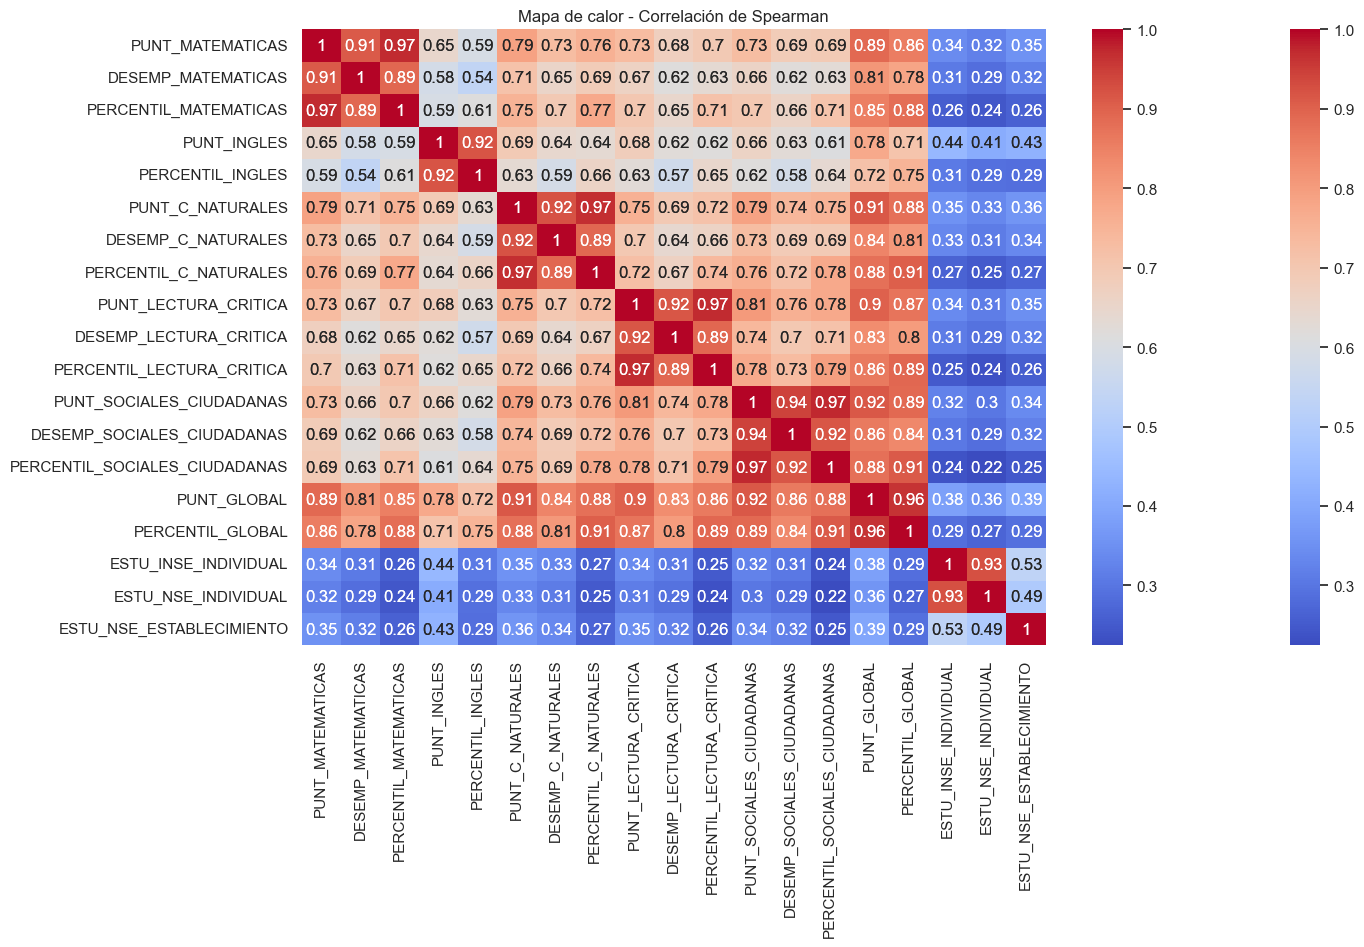

C:\Users\danie\AppData\Local\Temp\ipykernel_15564\3016903747.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


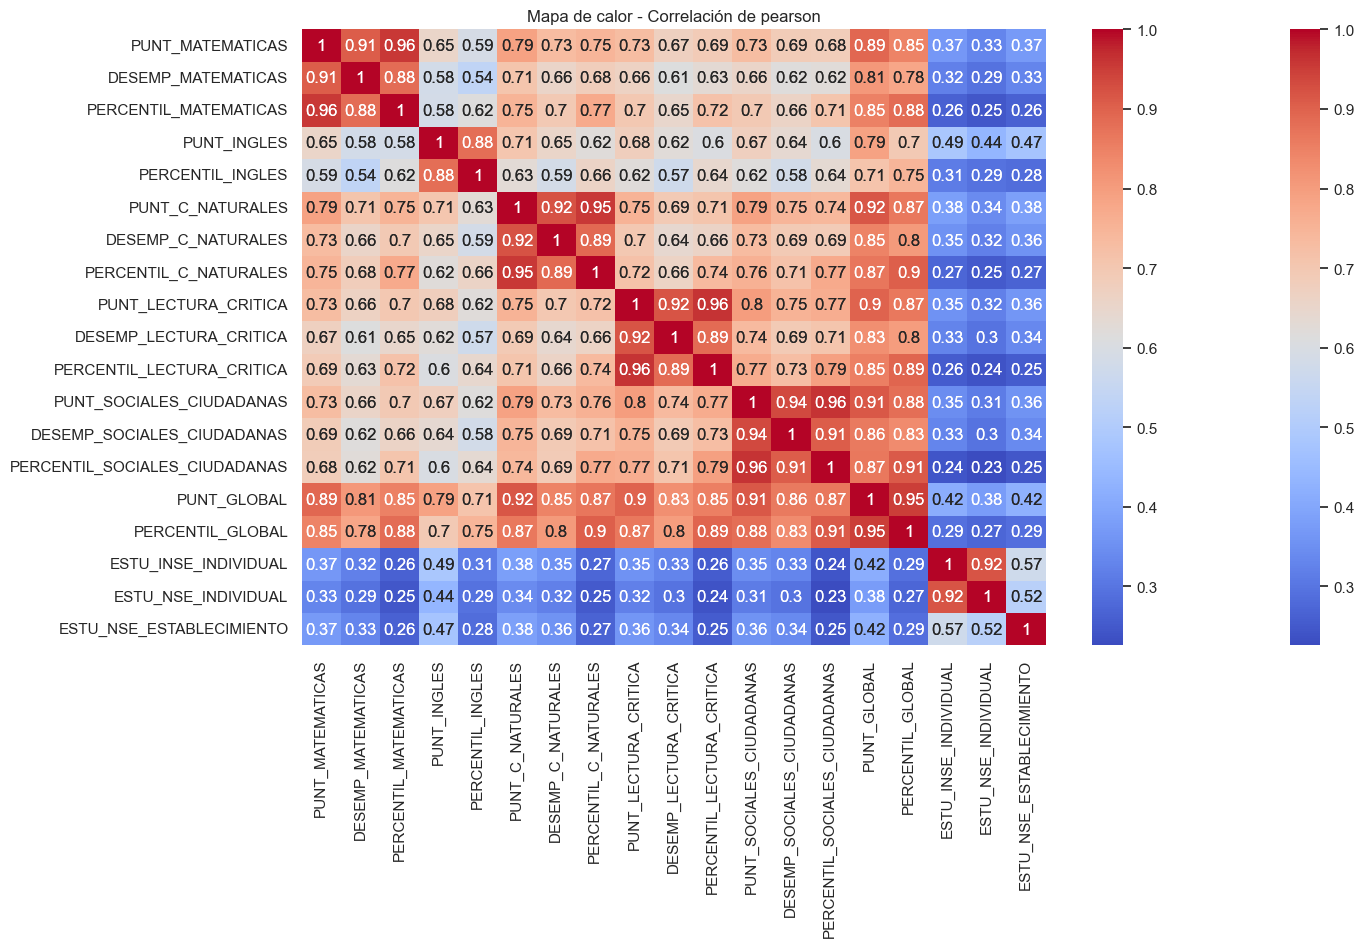

In [27]:
# Calcular la correlación de Spearman
correlation = df.corr(method='spearman')
sns.set(rc = {'figure.figsize':(15,8)})
# Crear el mapa de calor
sns.heatmap(correlation, annot=True, cmap='coolwarm')
mapa = sns.heatmap(correlation, annot=True, cmap='coolwarm')
figure = mapa.get_figure()    
figure.savefig(grph_dir+'mapa_de_calor_spearman.png', dpi=400)
plt.title('Mapa de calor - Correlación de Spearman')
plt.show()
# Calcular la correlación de pearson
correlation = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
# Crear el mapa de calor
sns.heatmap(correlation, annot=True, cmap='coolwarm')
mapa = sns.heatmap(correlation, annot=True, cmap='coolwarm')
figure = mapa.get_figure()    
figure.savefig(grph_dir+'mapa_de_calor_pearson.png', dpi=400)
plt.title('Mapa de calor - Correlación de pearson')
plt.show()

## Analisis de mapa de calor
Como se puede observar en el mapa de calor, las variables numéricas que más influyen en las variables objetivo “PUNT_GLOBAL”, "PUNT_MATEMATICAS", "PUNT_INGLES", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_SOCIALES_CIUDADANAS", son aquellas que van relacionadas a la prueba, puntajes y el desempeño del estudiante en las diferentes áreas que evalúa la prueba(Matemáticas, inglés, ciencias naturales, lectura crítica y ciencias sociales), sin embargo hay 3 variables relacionadas con el índice de nivel socioeconómico del estudiante, se puede observar que, entre estas y los puntajes de la prueba, hay un coeficiente alrededor de 0.4, esto se considera una correlación moderada, no es una correlación muy fuerte, pero tampoco es una correlación débil, indica que hay una relación observable entre las variables, aunque no es extremadamente fuerte.

In [12]:
# Gráficas de barras: Media de puntajes de temáticas que evalua el icfes por cada categoría de cada variable categórica

mediamate = df.groupby('FAMI_ESTRATOVIVIENDA')["PUNT_MATEMATICAS"].mean().reset_index()
mediaingles = df.groupby('FAMI_ESTRATOVIVIENDA')["PUNT_INGLES"].mean().reset_index()
medianaturales= df.groupby('FAMI_ESTRATOVIVIENDA')["PUNT_C_NATURALES"].mean().reset_index()
mediacritica= df.groupby('FAMI_ESTRATOVIVIENDA')["PUNT_LECTURA_CRITICA"].mean().reset_index()
mediasociales= df.groupby('FAMI_ESTRATOVIVIENDA')["PUNT_SOCIALES_CIUDADANAS"].mean().reset_index()


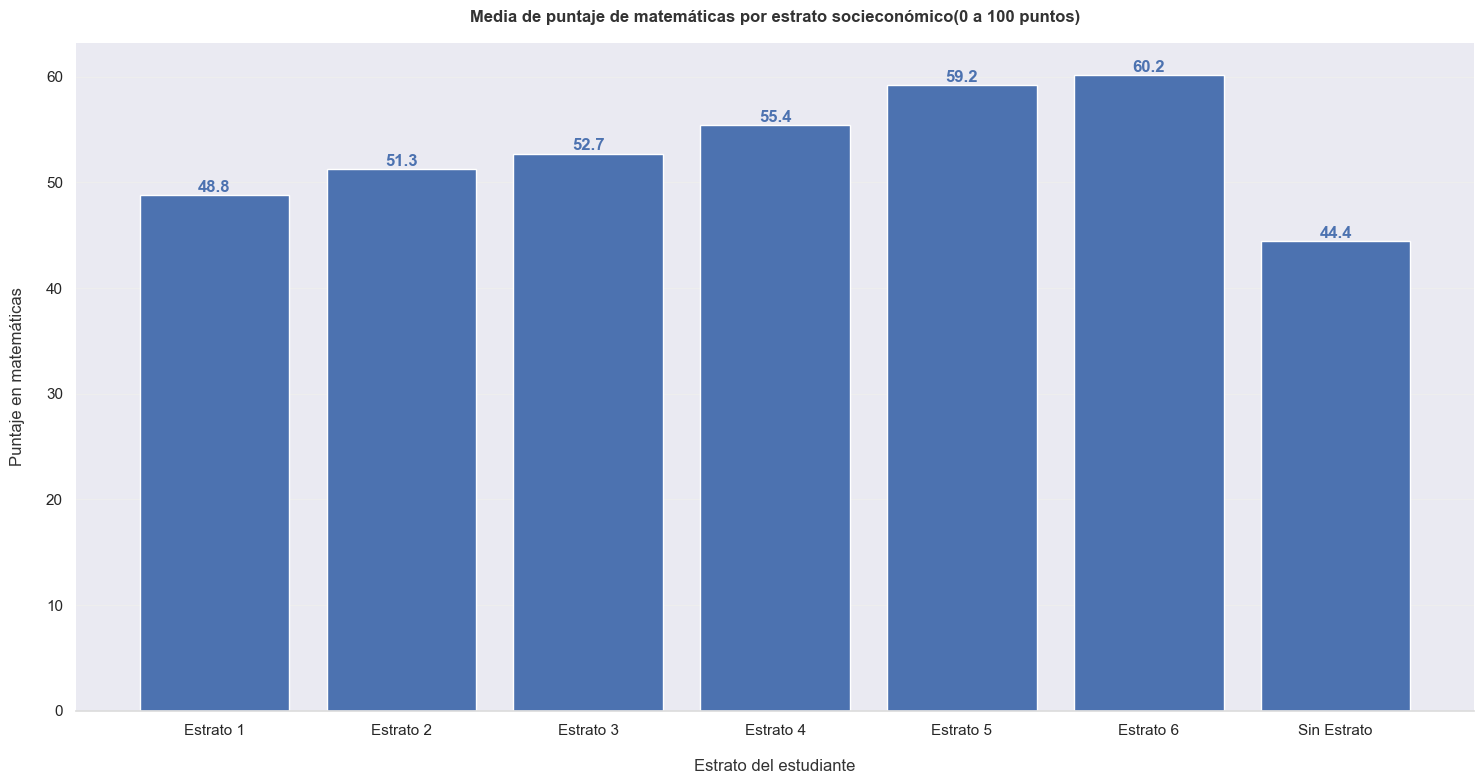

In [31]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=mediamate['FAMI_ESTRATOVIVIENDA'],
    height=mediamate['PUNT_MATEMATICAS'],
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title.
ax.set_xlabel('Estrato del estudiante', labelpad=15, color='#333333')
ax.set_ylabel('Puntaje en matemáticas', labelpad=15, color='#333333')
ax.set_title('Media de puntaje de matemáticas por estrato socieconómico(0 a 100 puntos)', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()
fig.savefig(grph_dir+'estrato_matematicas.png')

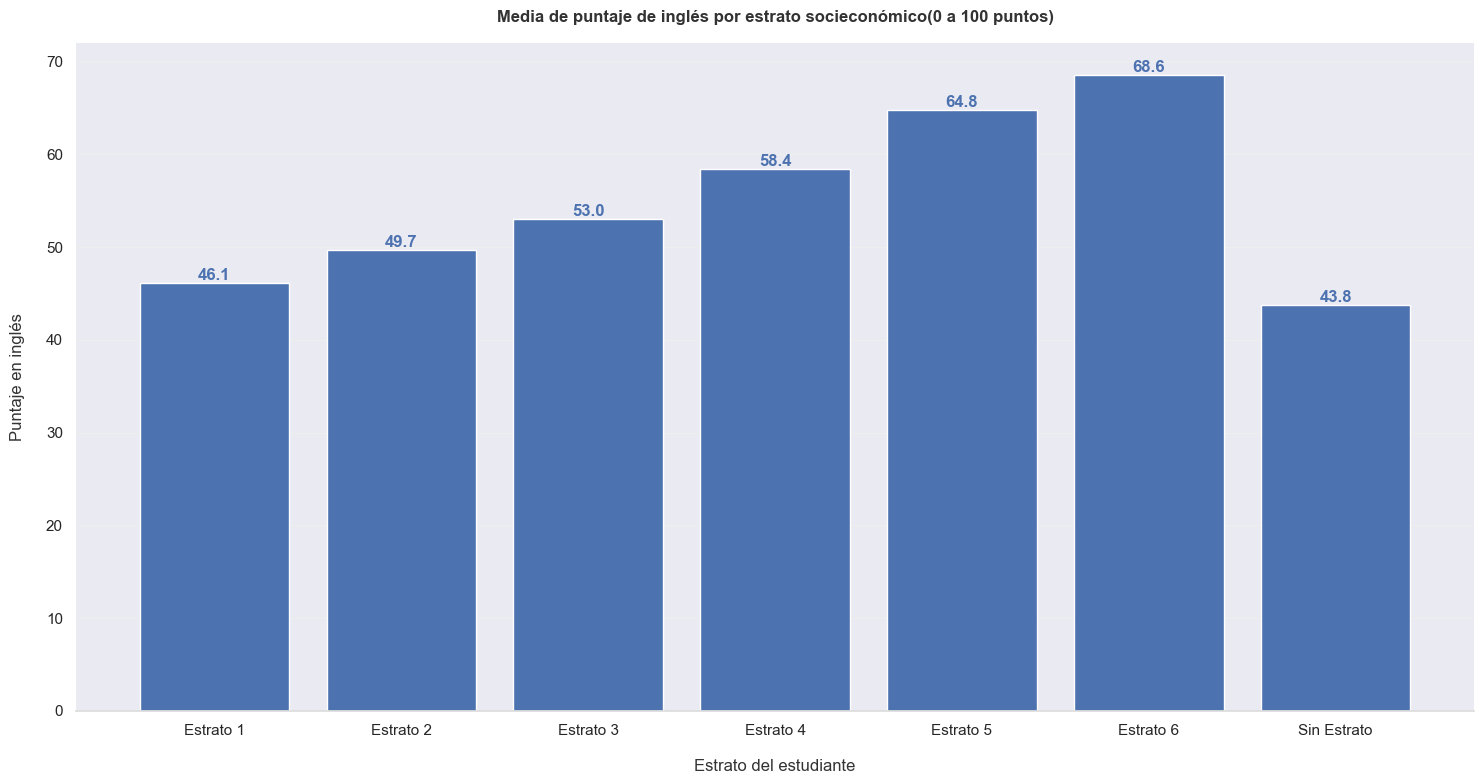

In [33]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=mediaingles['FAMI_ESTRATOVIVIENDA'],
    height=mediaingles['PUNT_INGLES'],
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title.
ax.set_xlabel('Estrato del estudiante', labelpad=15, color='#333333')
ax.set_ylabel('Puntaje en inglés', labelpad=15, color='#333333')
ax.set_title('Media de puntaje de inglés por estrato socieconómico(0 a 100 puntos)', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()
fig.savefig(grph_dir+'estrato_inlgles.png')

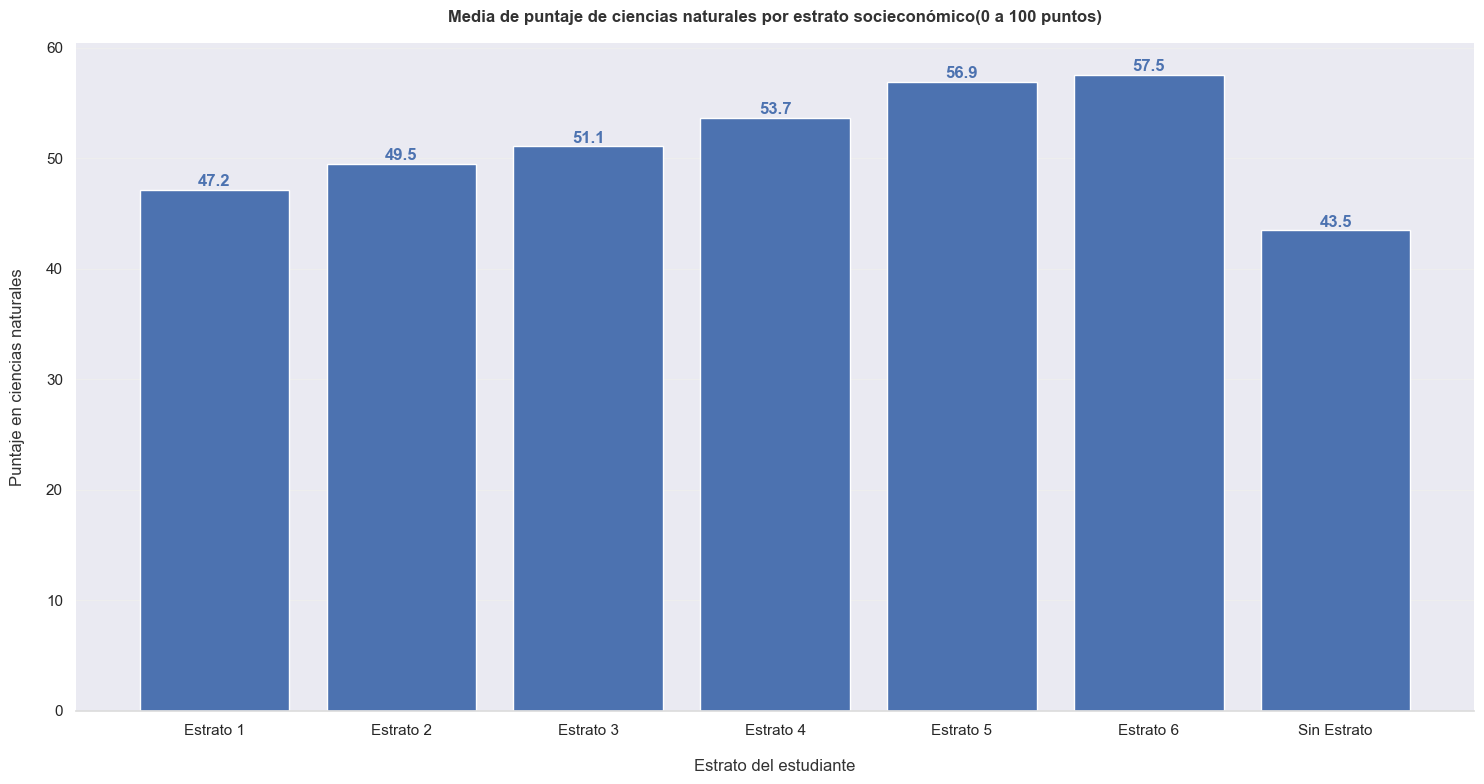

In [34]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=medianaturales['FAMI_ESTRATOVIVIENDA'],
    height=medianaturales['PUNT_C_NATURALES'],
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title.
ax.set_xlabel('Estrato del estudiante', labelpad=15, color='#333333')
ax.set_ylabel('Puntaje en ciencias naturales', labelpad=15, color='#333333')
ax.set_title('Media de puntaje de ciencias naturales por estrato socieconómico(0 a 100 puntos)', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()
fig.savefig(grph_dir+'estrato_c_naturales.png')

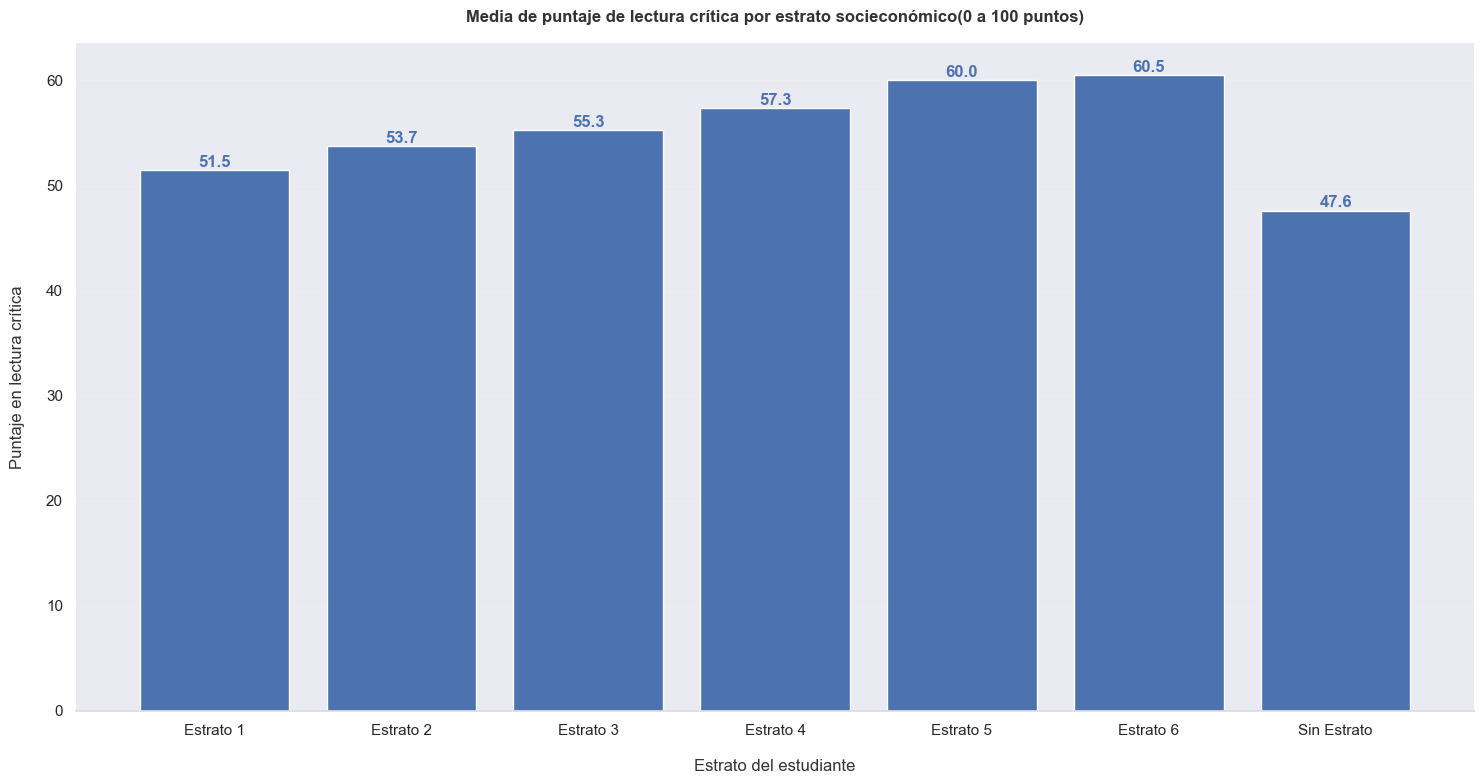

In [35]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=mediacritica['FAMI_ESTRATOVIVIENDA'],
    height=mediacritica['PUNT_LECTURA_CRITICA'],
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title.
ax.set_xlabel('Estrato del estudiante', labelpad=15, color='#333333')
ax.set_ylabel('Puntaje en lectura crítica', labelpad=15, color='#333333')
ax.set_title('Media de puntaje de lectura crítica por estrato socieconómico(0 a 100 puntos)', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()
fig.savefig(grph_dir+'estrato_l_critica.png')

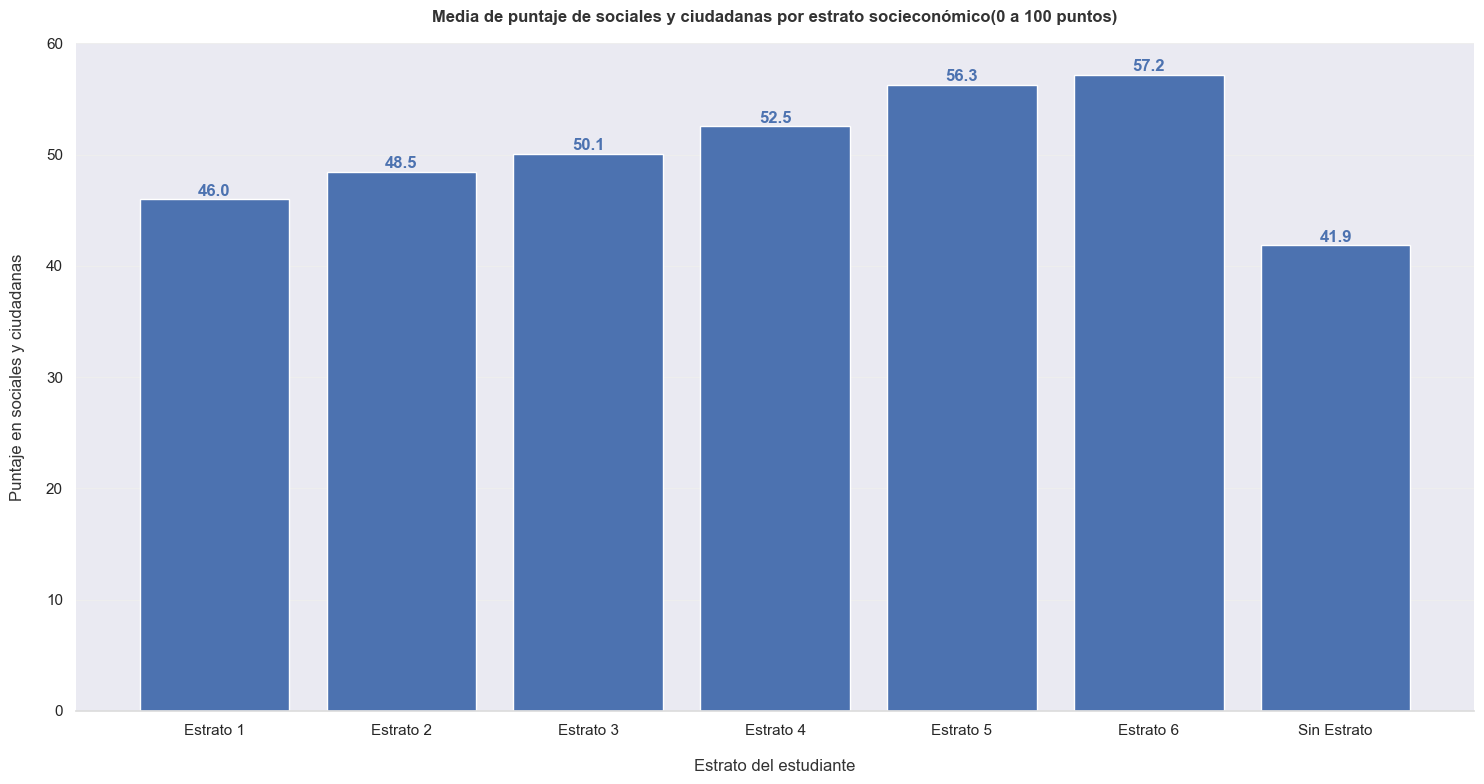

In [36]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=mediasociales['FAMI_ESTRATOVIVIENDA'],
    height=mediasociales['PUNT_SOCIALES_CIUDADANAS'],
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title.
ax.set_xlabel('Estrato del estudiante', labelpad=15, color='#333333')
ax.set_ylabel('Puntaje en sociales y ciudadanas', labelpad=15, color='#333333')
ax.set_title('Media de puntaje de sociales y ciudadanas por estrato socieconómico(0 a 100 puntos)', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()
fig.savefig(grph_dir+'estrato_sociales.png')

## Análisis de gráficos de barra
En los gráficos de barras se puede observar la distribución de la media de puntajes en cada área que califican las pruebas saber 11 por estrato socioeconómico de los estudiantes, se puede concluir que entre más alto el estrato es mejor el puntaje, se puede ver una mejor diferencia en el puntaje de inglés.

In [14]:
#Media de puntajes por cada categoría de cada variable categórica
for col in colObjects:
  media = df.groupby(col)["PUNT_GLOBAL"].mean().reset_index()
  mediamate = df.groupby(col)["PUNT_MATEMATICAS"].mean().reset_index()
  mediaingles = df.groupby(col)["PUNT_INGLES"].mean().reset_index()
  medianaturales= df.groupby(col)["PUNT_C_NATURALES"].mean().reset_index()
  mediacritica= df.groupby(col)["PUNT_LECTURA_CRITICA"].mean().reset_index()
  mediasociales= df.groupby(col)["PUNT_SOCIALES_CIUDADANAS"].mean().reset_index()
  print(media)
  print(mediamate)
  print(mediaingles)
  print(medianaturales)
  print(mediacritica)
  print(mediasociales)
  print("____________________________________________________________________")

  ESTU_TIENEETNIA  PUNT_GLOBAL
0              No   256.774593
1              Si   228.674667
  ESTU_TIENEETNIA  PUNT_MATEMATICAS
0              No         51.873389
1              Si         46.238631
  ESTU_TIENEETNIA  PUNT_INGLES
0              No    51.194828
1              Si    44.393891
  ESTU_TIENEETNIA  PUNT_C_NATURALES
0              No         50.138774
1              Si         44.791341
  ESTU_TIENEETNIA  PUNT_LECTURA_CRITICA
0              No             54.316191
1              Si             49.031121
  ESTU_TIENEETNIA  PUNT_SOCIALES_CIUDADANAS
0              No                 49.146421
1              Si                 43.331305
____________________________________________________________________
                     FAMI_EDUCACIONPADRE  PUNT_GLOBAL
0         Educación profesional completa   279.885429
1       Educación profesional incompleta   278.469008
2                                Ninguno   220.342474
3                              No Aplica   260.008206
4      

  FAMI_COMECEREALFRUTOSLEGUMBRE  PUNT_GLOBAL
0        1 o 2 veces por semana   250.559233
1        3 a 5 veces por semana   262.330884
2  Nunca o rara vez comemos eso   240.288431
3   Todos o casi todos los días   260.511304
  FAMI_COMECEREALFRUTOSLEGUMBRE  PUNT_MATEMATICAS
0        1 o 2 veces por semana         50.734449
1        3 a 5 veces por semana         53.094282
2  Nunca o rara vez comemos eso         48.482403
3   Todos o casi todos los días         52.263373
  FAMI_COMECEREALFRUTOSLEGUMBRE  PUNT_INGLES
0        1 o 2 veces por semana    49.428710
1        3 a 5 veces por semana    52.395189
2  Nunca o rara vez comemos eso    47.010931
3   Todos o casi todos los días    53.048198
  FAMI_COMECEREALFRUTOSLEGUMBRE  PUNT_C_NATURALES
0        1 o 2 veces por semana         48.972356
1        3 a 5 veces por semana         51.187975
2  Nunca o rara vez comemos eso         46.953308
3   Todos o casi todos los días         50.864130
  FAMI_COMECEREALFRUTOSLEGUMBRE  PUNT_LECTURA_CRIT

## Análisis de media de puntajes por categoría
Al observar las tablas y las gráficas de barras con las medias de puntaje por cada categoría se puede concluir lo siguiente:
- Etnia: Para los estudiantes que no pertenecen a una etnia tienen una diferencia de 28 puntos más en comparación a los que pertenecen a una etnia, para los demás putajes las diferencias de puntajes varían desde 5 a 7 puntos para el puntaje de ingles.
- Educación de padres: Se puede observar una gran diferencia de puntaje para aquellos estudiantes que sus padres lograron obtener un postgrado, con una media de más de 310 puntos, en comparación a aquellos estudiantes que sus padres no tienen ningún tipo de educación, con una media de 220 puntos.
- Estrato de la vivienda: En cuanto más estrato de la vivienda del estudiante es mejor el puntaje, para el estrato 6 la media es de 298 puntos, y para las viviendas sin estrato la media es de 221 puntos.
- Personas en el hogar: La mejor media de puntajes es para aquellos hogares donde viven entre 3 a 4 personas con 259 puntos, una diferencia de 25 en comparación a los hogares donde viven 9 o más personas.
- Tiene internet: Existe una diferencia de 27 puntos entre los estudiantes que no tienen internet con 232 de media, y los que si tienen internet con 259 puntos de media.
- Tiene computador: Muy similar al anterior una diferencia de 26 puntos entre los que no tienen computador con 237 puntos y los que si tienen computador con 263 puntos.
- Tiene automóvil: Para aquellos estudiantes donde la familia tiene un automóvil la media de puntaje es de 271 y para los que no la media es de 248, una diferencia de 23 puntos.
- Número de libros: Los estudiantes los cuales en su hogar tienen más de 100 libros la media de puntaje es de 285, en cambio para los que tienen de 0 a 10 libros la media es de 241.
- Dedicación a lectura: Los estudiantes que dedican más de 2 horas para leer diariamente tienen una media de 274 puntos, en cambio los que no leen por entretenimiento tienen 243 puntos, una diferencia de 31 puntos.
- Dedicación a internet: Los estudiantes que dedican más de 3 horas diarias a internet obtienen una media de 262 puntos, aquellos que no navegan en internet tienen una media de 227 puntos, una diferencia de 34 puntos.
- Horas a la semana que trabaja: Los estudiantes que trabajan más de 30 horas a la semana tienen una media de 236 puntos, en cambio los que no dedican horas a trabajar obtienen una media de 260 puntos.
- Come leche y derivados: Los estudiantes que suelen comer todos los días leche o sus derivados obtienen una media de puntaje de 267, aquellos que nunca o rara vez comen eso la media de puntaje es de 238.
- Come carne, pescado, huevo: Los estudiantes que suelen comer todos los días carne, pescado, huevo obtienen una media de puntaje de 262, aquellos que nunca o rara vez comen eso la media de puntaje es de 234.
- Come cereales, frutos, legumbres: Los estudiantes que suelen comer de 3 a 5 veces por semana cereales, frutos, legumbres obtienen una media de puntaje de 262, aquellos que nunca o rara vez comen eso la media de puntaje es de 240.
- Trabajo de los padres: Los estudiantes cuyos padres trabajan como profesionales tienen una media de 285 de puntaje, en cambio los que trabajan como agricultores, pesqueros o jornaleros tienen una media de puntaje de 228.
- Jornada del colegio: Para los estudiantes que estudian en un colegio cuya jornada es completa la media de puntaje es de 301, en cambio para aquellos con jornada sabatina la media de puntaje es de 208.
- Genero del colegio: Para los estudiantes que pertenecen a un colegio masculino la media es de 295 puntos, para aquellos que pertenecen a un colegio mixto la media de puntaje es de 254 puntos.
- Naturaleza del colegio: Para los estudiantes cuyo colegio sea de naturaleza oficial la media de puntaje es de 247, en cambio para los colegios no oficiales la media de puntaje es de 273.
- Calendario del colegio: Para los estudiantes de calendario B la media de puntajes es de 292, para los que pertenecen a otro calendario fuera de A o B la media de puntaje es de 234.
- Colegio bilingüe: Para los estudiantes que pertenecen a un colegio bilingüe la media de puntaje es de 295, en cambio los que no la media es de 253.
- Carácter del colegio: Para los estudiantes que pertenecen a un colegio cuyo carácter sea académico la media de puntaje es de 263, en cambio los que no aplican tienen un puntaje de 213.
- Desempeño en inglés: Para aquellos estudiantes donde su nivel de inglés en el examen es de B+ la media de puntaje es de 352, en cambio los que obtuvieron una calificación de A- la media de puntaje es de 219.


In [15]:
#Se eliminan las variables categoricas cuya diferencia de puntaje entre sus categorias era menor a 20, además se elimina la variable DESEMP_INGLES ya que esta información solo se puede obtener cuando el estudiante ya haya hehco la prueba, y también se elmina la variable semestre ya que no será útil para el modelo 

df=df.drop(columns=['FAMI_CUARTOSHOGAR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_SITUACIONECONOMICA', 'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'DESEMP_INGLES'])

In [16]:
df

,ESTU_TIENEETNIA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENEAUTOMOVIL,FAMI_NUMLIBROS,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,COLE_JORNADA,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,PUNT_MATEMATICAS,DESEMP_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_C_NATURALES,DESEMP_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,SEMESTRE
0,Si,Técnica o tecnológica completa,Técnica o tecnológica completa,Estrato 1,3 a 4,Si,Si,No,26 A 100 LIBROS,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",MAÑANA,MIXTO,NO OFICIAL,A,N,TÉCNICO/ACADÉMICO,72,4,97,68.0,90.0,67,3,95,76,4,100,69,3,97,354,98.0,56.170674,3.0,2.0,2022-2
1,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Estrato 4,1 a 2,No,Si,No,26 A 100 LIBROS,Entre 1 y 2 horas,Entre 30 y 60 minutos,Menos de 10 horas,1 o 2 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como personal de limpieza, mantenimien...",MAÑANA,MIXTO,NO OFICIAL,A,S,ACADÉMICO,72,4,97,75.0,96.0,67,3,95,70,4,95,66,3,94,346,97.0,46.545809,2.0,3.0,2022-2
2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Sin Estrato,7 a 8,Si,No,No,11 A 25 LIBROS,Entre 1 y 2 horas,Más de 3 horas,Más de 30 horas,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,MAÑANA,MIXTO,OFICIAL,A,N,ACADÉMICO,30,1,5,32.0,4.0,39,1,18,37,2,9,35,1,15,175,6.0,47.293140,2.0,2.0,2022-2
3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,3 a 4,No,No,Si,0 A 10 LIBROS,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,1 o 2 veces por semana,Nunca o rara vez comemos eso,3 a 5 veces por semana,No sabe,"Trabaja en el hogar, no trabaja o estudia",MAÑANA,MIXTO,OFICIAL,A,N,TÉCNICO,30,1,5,34.0,9.0,37,1,13,37,2,8,37,1,22,176,7.0,43.190455,2.0,2.0,2022-2
4,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,3 a 4,Si,Si,No,11 A 25 LIBROS,Entre 1 y 2 horas,Más de 3 horas,0,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja en el hogar, no trabaja o estudia",MAÑANA,MIXTO,OFICIAL,A,N,ACADÉMICO,29,1,4,40.0,28.0,31,1,2,44,2,24,38,1,24,179,8.0,52.126657,3.0,3.0,2022-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126268,No,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 3,3 a 4,Si,Si,Si,11 A 25 LIBROS,No leo por entretenimiento,Entre 30 y 60 minutos,0,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Pensionado,"Trabaja en el hogar, no trabaja o estudia",MAÑANA,MIXTO,NO OFICIAL,B,N,TÉCNICO,42,2,18,41.0,19.0,43,2,24,42,2,12,46,2,33,215,21.0,61.186478,3.0,3.0,2019-1
126269,No,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,Estrato 3,5 a 6,Si,Si,No,11 A 25 LIBROS,30 minutos o menos,Entre 30 y 60 minutos,0,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",MAÑANA,MIXTO,NO OFICIAL,B,N,TÉCNICO,6

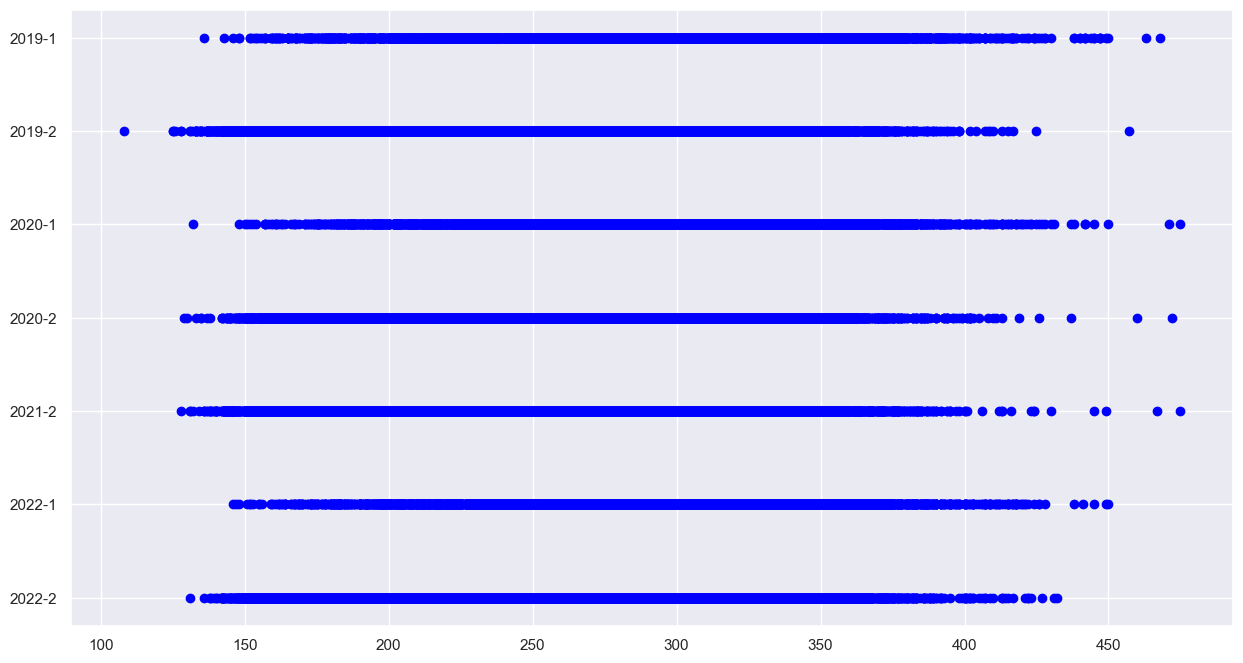

In [37]:
#Gráfico de dispersión de la variable puntaje global a través de los semestres 
fig= plt.figure()
ax=plt.axes()
x=df['PUNT_GLOBAL'].values
y=df['SEMESTRE'].values
plt.plot(x, y, 'o', color='blue')
plt.savefig(grph_dir+'dipsersion_global.png')

## Análisis de gráfico de dispersión de puntaje global
El puntaje de la prueba saber 11 tiene un rango entre 0 y 500 puntos, en la gráfica se puede observar que a través de los semestres no hubo ningún resultado por debajo de los 100 puntos, la mayoría de puntajes se concentran entre los 150 y los 400 puntos.

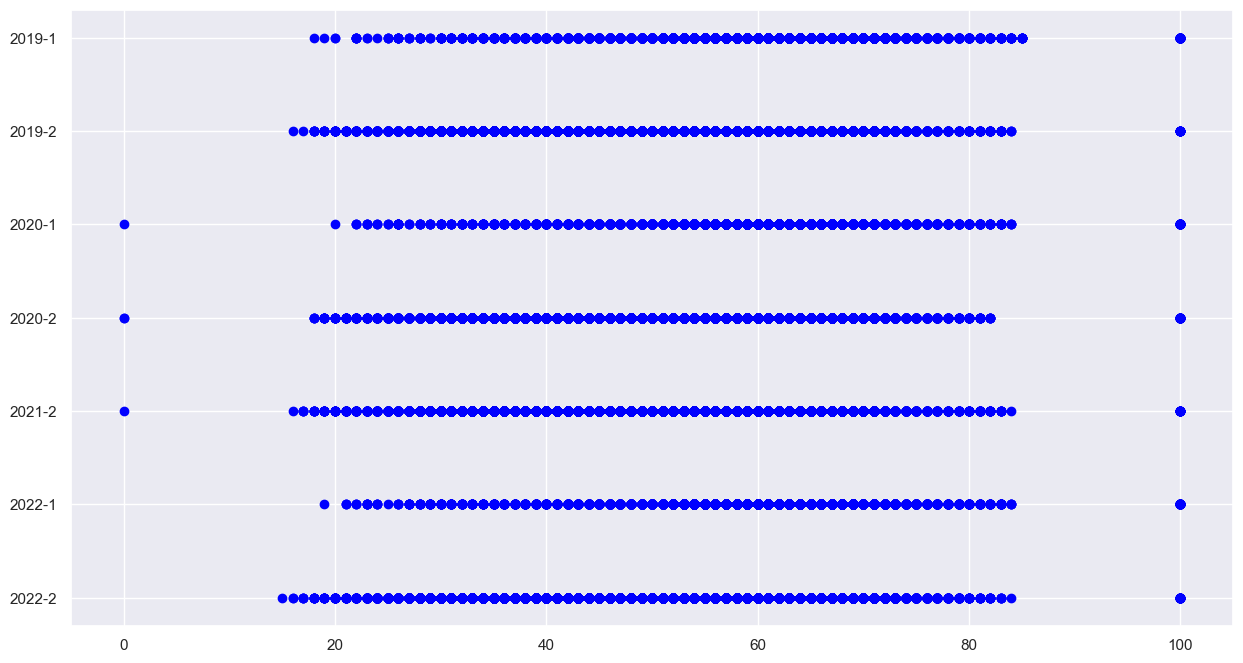

In [38]:
#Gráfico de dispersión de la variable puntaje de matemáticas a través de los semestres 
fig= plt.figure()
ax=plt.axes()
x=df['PUNT_MATEMATICAS'].values
y=df['SEMESTRE'].values
plt.plot(x, y, 'o', color='blue')
plt.savefig(grph_dir+'dipsersion_matematicas.png')

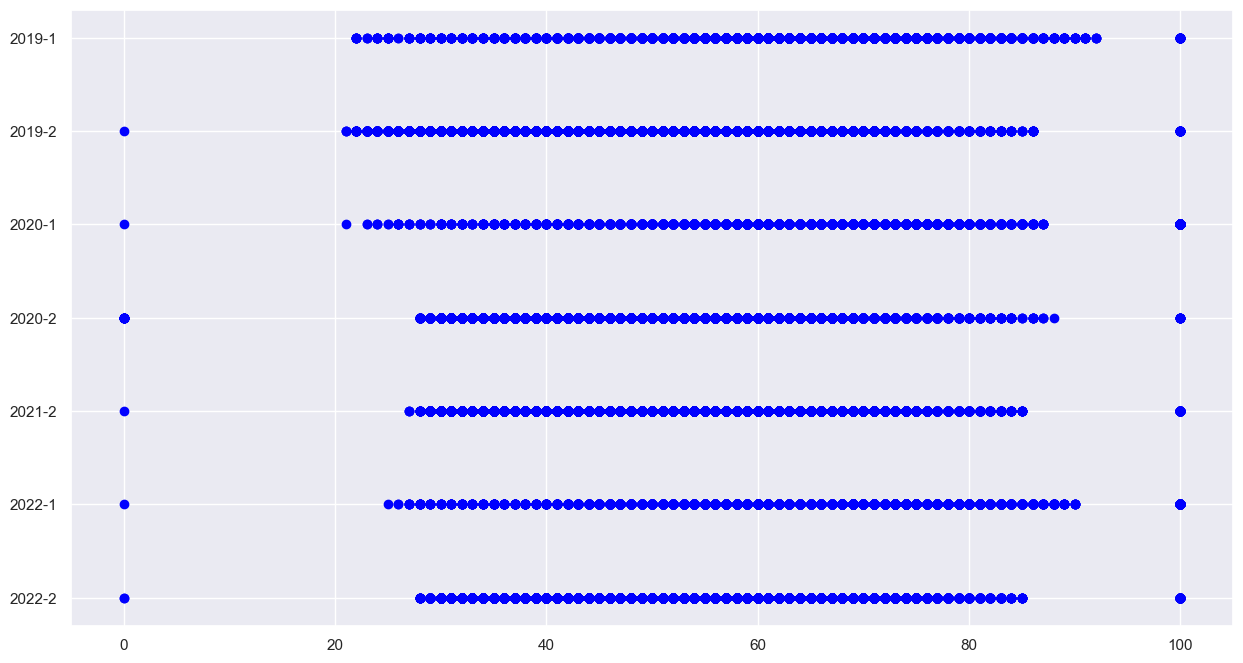

In [39]:
#Gráfico de dispersión de la variable puntaje de inglés a través de los semestres 
fig= plt.figure()
ax=plt.axes()
x=df['PUNT_INGLES'].values
y=df['SEMESTRE'].values
plt.plot(x, y, 'o', color='blue')
plt.savefig(grph_dir+'dipsersion_ingles.png')

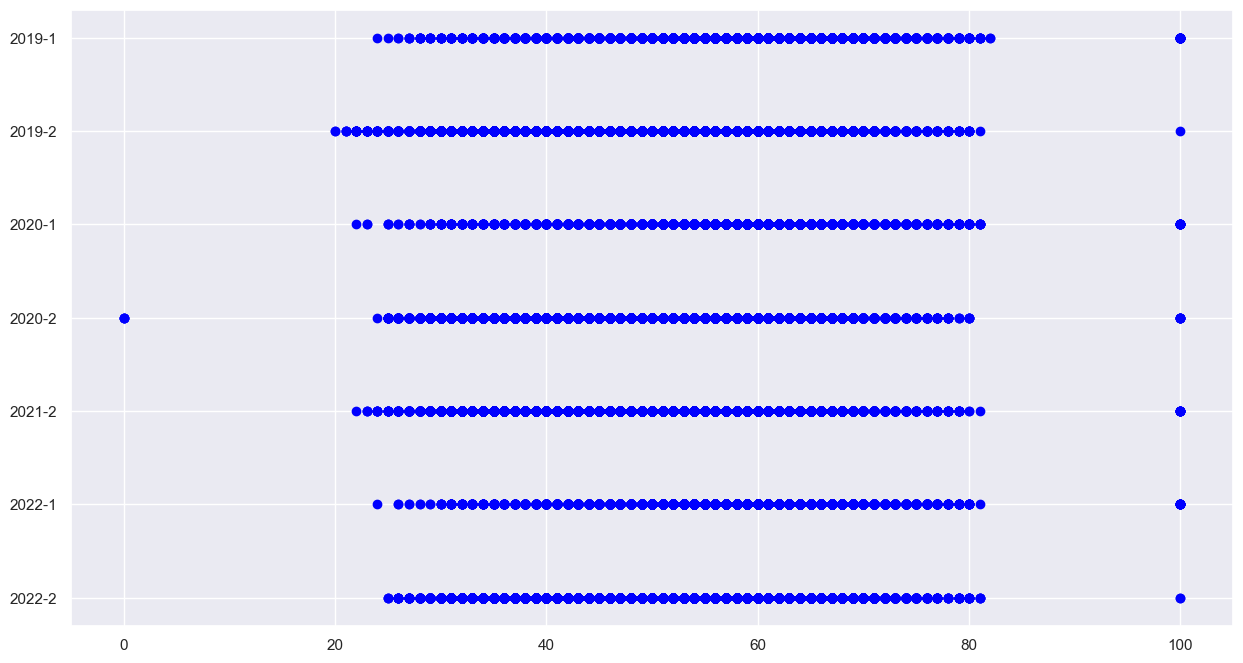

In [40]:
#Gráfico de dispersión de la variable puntaje de ciencias naturales a través de los semestres 
fig= plt.figure()
ax=plt.axes()
x=df['PUNT_C_NATURALES'].values
y=df['SEMESTRE'].values
plt.plot(x, y, 'o', color='blue')
plt.savefig(grph_dir+'dipsersion_c_naturales.png')

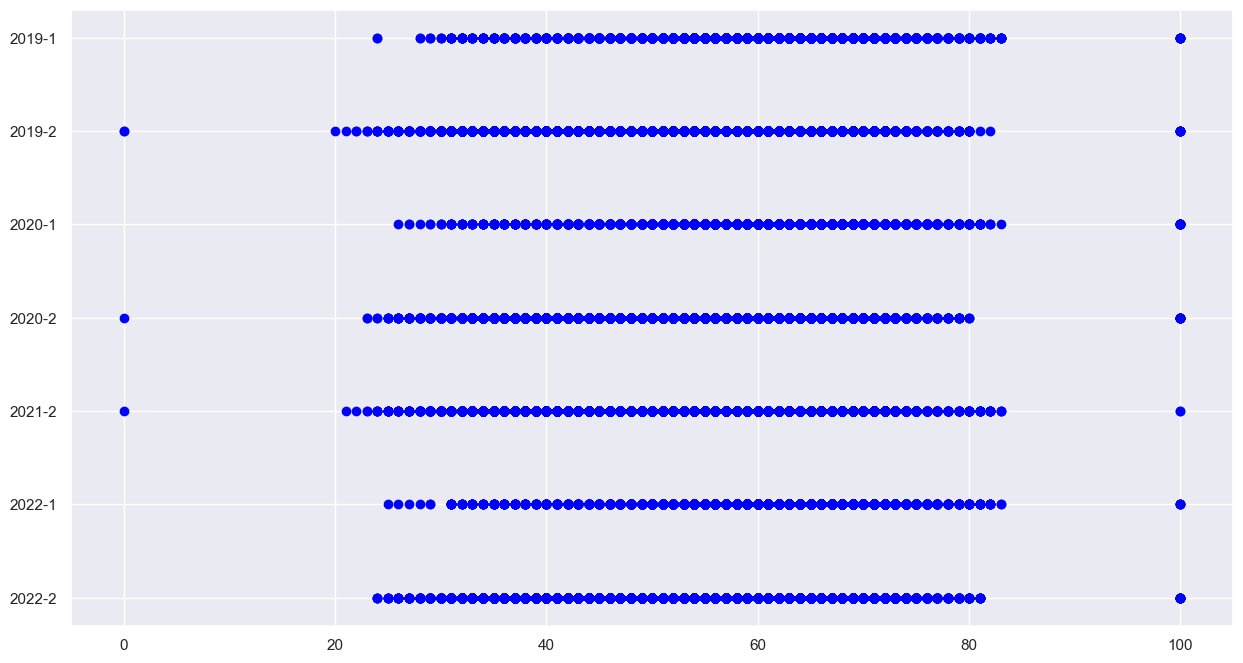

In [41]:
#Gráfico de dispersión de la variable puntaje de lectura crítica a través de los semestres 
fig= plt.figure()
ax=plt.axes()
x=df['PUNT_LECTURA_CRITICA'].values
y=df['SEMESTRE'].values
plt.plot(x, y, 'o', color='blue')
plt.savefig(grph_dir+'dipsersion_l_critica.png')

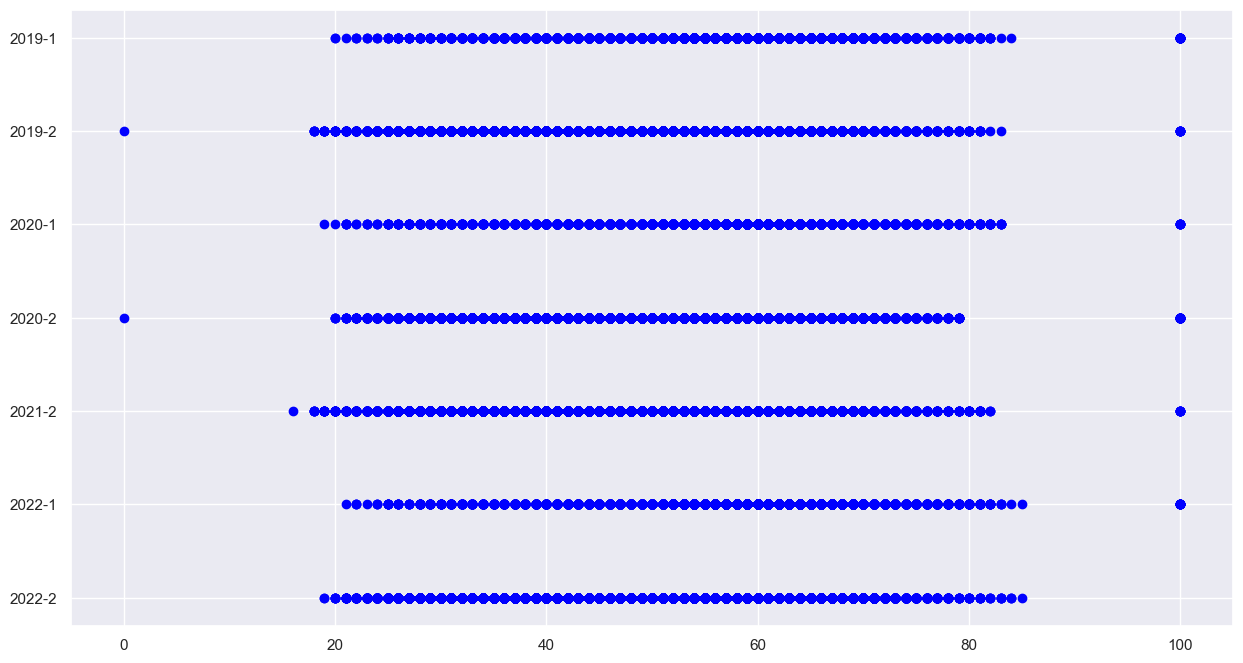

In [42]:
#Gráfico de dispersión de la variable puntaje de sociales y ciudadanas a través de los semestres 
fig= plt.figure()
ax=plt.axes()
x=df['PUNT_SOCIALES_CIUDADANAS'].values
y=df['SEMESTRE'].values
plt.plot(x, y, 'o', color='blue')
plt.savefig(grph_dir+'dipsersion_sociales_ciudadanas.png')

## Análisis de gráficos de dispersión de puntajes
Para los puntajes por temática que se evalua en la prueba saber 11 los rangos de valores van desde 0 hasta 100 puntos posibles, se puede observar que la mayoría de puntajes se concentran entre los 20 y 80 puntos, y esintes algunos datos anormales que llegan al máximo(100 puntos) y mínimo(0 puntos) que se puede obtener.

In [43]:
#Se limpian las columnas eliminadas de la lista con variables categoricas
df=df.drop(columns=['SEMESTRE'])
eliminadas=['FAMI_CUARTOSHOGAR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_SITUACIONECONOMICA', 'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'DESEMP_INGLES', 'SEMESTRE']
for col in eliminadas:
  colObjects.remove(col)
colObjects

['ESTU_TIENEETNIA',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_PERSONASHOGAR',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_NUMLIBROS',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_DEDICACIONINTERNET',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'COLE_JORNADA',
 'COLE_GENERO',
 'COLE_NATURALEZA',
 'COLE_CALENDARIO',
 'COLE_BILINGUE',
 'COLE_CARACTER']

In [44]:
df

,ESTU_TIENEETNIA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENESERVICIOTV,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_SITUACIONECONOMICA,COLE_JORNADA,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,ESTU_PRIVADO_LIBERTAD,PUNT_MATEMATICAS,DESEMP_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_C_NATURALES,DESEMP_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,Si,Técnica o tecnológica completa,Técnica o tecnológica completa,Estrato 1,3 a 4,Dos,Si,Si,Si,Si,Si,No,Si,No,26 A 100 LIBROS,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Igual,MAÑANA,MIXTO,NO OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,N,72,4,97,68.0,90.0,B1,67,3,95,76,4,100,69,3,97,354,98.0,56.170674,3.0,2.0
1,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Estrato 4,1 a 2,Uno,No,Si,Si,No,No,No,No,No,26 A 100 LIBROS,Entre 1 y 2 horas,Entre 30 y 60 minutos,Menos de 10 horas,1 o 2 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como personal de limpieza, mantenimien...",Peor,MAÑANA,MIXTO,NO OFICIAL,A,S,ACADÉMICO,S,URBANO,N,72,4,97,75.0,96.0,B1,67,3,95,70,4,95,66,3,94,346,97.0,46.545809,2.0,3.0
2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Sin Estrato,7 a 8,Seis o mas,Si,No,Si,No,No,No,No,No,11 A 25 LIBROS,Entre 1 y 2 horas,Más de 3 horas,Más de 30 horas,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,Mejor,MAÑANA,MIXTO,OFICIAL,A,N,ACADÉMICO,N,RURAL,N,30,1,5,32.0,4.0,A-,39,1,18,37,2,9,35,1,15,175,6.0,47.293140,2.0,2.0
3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,3 a 4,Dos,No,No,No,No,Si,Si,Si,No,0 A 10 LIBROS,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,1 o 2 veces por semana,Nunca o rara vez comemos eso,3 a 5 veces por semana,No sabe,"Trabaja en el hogar, no trabaja o estudia",Mejor,MAÑANA,MIXTO,OFICIAL,A,N,TÉCNICO,S,URBANO,N,30,1,5,34.0,9.0,A-,37,1,13,37,2,8,37,1,22,176,7.0,43.190455,2.0,2.0
4,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,3 a 4,Dos,Si,Si,No,No,Si,No,No,No,11 A 25 LIBROS,Entre 1 y 2 horas,Más de 3 horas,0,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja en el hogar, no trabaja o estudia",Igual,MAÑANA,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,N,29,1,4,40.0,28.0,A-,31,1,2,44,2,24,38,1,24,179,8.0,52.126657,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126268,No,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 3,3 a 4,Cuatro,Si,Si,Si,Si,Si,Si,No,Si,11 A 25 LIBROS,No leo por entretenimiento,Entre 30 y 60 minutos,0,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Pensionado,"Trabaja en el hogar, no trabaja o estudia",Igual,MAÑANA,MIXTO,NO OFICIAL,B

## Fusión de categorías
En el análisis de medias de puntajes por categoría se logra observar que en muchas de las variables hay categorías que tienen una media de puntaje muy similar, es por eso que se ha deicido fusionar aquellas categorías donde la diferencia no es muy relevante y puede hacer que confunda al modelo

In [45]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_EDUCACIONPADRE
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].map({'Educación profesional completa':'Padre Educación profesional completa o incompleta',
                             'Educación profesional incompleta':'Padre Educación profesional completa o incompleta',
                             'No Aplica':'Padre No sabe o no aplica',
                             'No sabe':'Padre No sabe o no aplica',
                             'Ninguno':'Padre Ninguno',
                             'Postgrado':'Padre Postgrado',
                             'Primaria completa':'Padre Primaria completa o incompleta',
                             'Primaria incompleta':'Padre Primaria completa o incompleta',
                             'Secundaria (Bachillerato) completa':'Padre Bachillerato completa o incompleta',
                             'Secundaria (Bachillerato) incompleta':'Padre Bachillerato completa o incompleta',
                             'Técnica o tecnológica completa':'Padre Técnica o tecnológica completa o incompleta',
                             'Técnica o tecnológica incompleta':'Padre Técnica o tecnológica completa o incompleta'})

In [46]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_EDUCACIONMADRE
df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].map({'Educación profesional completa':'Madre Educación profesional completa o incompleta',
                             'Educación profesional incompleta':'Madre Educación profesional completa o incompleta',
                             'No Aplica':'Madre No sabe o no aplica',
                             'No sabe':'Madre No sabe o no aplica',
                             'Ninguno':'Madre Ninguno',
                             'Postgrado':'Madre Postgrado',
                             'Primaria completa':'Madre Primaria completa o incompleta',
                             'Primaria incompleta':'Madre Primaria completa o incompleta',
                             'Secundaria (Bachillerato) completa':'Madre Bachillerato completa o incompleta',
                             'Secundaria (Bachillerato) incompleta':'Madre Bachillerato completa o incompleta',
                             'Técnica o tecnológica completa':'Madre Técnica o tecnológica completa o incompleta',
                             'Técnica o tecnológica incompleta':'Madre Técnica o tecnológica completa o incompleta'})

In [47]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_ESTRATOVIVIENDA
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map({'Estrato 5':'Estrato 5 o 6',
                             'Estrato 5':'Estrato 5 o 6',
                             'Estrato 1':'Estrato 1',
                             'Estrato 2':'Estrato 2',
                             'Estrato 3':'Estrato 3',
                             'Estrato 4':'Estrato 4',
                             'Sin Estrato':'Sin Estrato'})

In [48]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_PERSONASHOGAR
df['FAMI_PERSONASHOGAR'] = df['FAMI_PERSONASHOGAR'].map({'1 a 2':'1 a 2 personas o 5 a 6 personas',
                             '5 a 6':'1 a 2 personas o 5 a 6 personas',
                             '3 a 4':'3 a 4 personas',
                             '7 a 8':'7 a 8 personas',
                             '9 o más':'9 o más'})

In [49]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_NUMLIBROS
df['FAMI_NUMLIBROS'] = df['FAMI_NUMLIBROS'].map({'0 A 10 LIBROS':'0 a 25 LIBROS',
                             '11 A 25 LIBROS':'0 a 25 LIBROS',
                             '26 A 100 LIBROS':'26 o MÁS LIBROS',
                             'MÁS DE 100 LIBROS':'26 o MÁS LIBROS'})

In [50]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna ESTU_DEDICACIONLECTURADIARIA
df['ESTU_DEDICACIONLECTURADIARIA'] = df['ESTU_DEDICACIONLECTURADIARIA'].map({'Entre 1 y 2 horas':'Entre 30 minutos y 2 horas de lectura',
                             'Entre 30 y 60 minutos':'Entre 30 minutos y 2 horas de lectura',
                             '30 minutos o menos':'30 minutos o menos de lectura',
                             'Más de 2 horas':'Más de 2 horas de lectura',
                             'No leo por entretenimiento':'No lee por entretenimiento'})

In [51]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna ESTU_DEDICACIONINTERNET
df['ESTU_DEDICACIONINTERNET'] = df['ESTU_DEDICACIONINTERNET'].map({'Entre 1 y 3 horas':'Más de 1 hora en internet',
                             'Más de 3 horas':'Más de 1 hora en internet',
                             '30 minutos o menos':'Entre 1 hora o menos en internet',
                             'Más de 3 horas':'Entre 1 hora o menos en internet',
                             'No Navega Internet':'No Navega Internet'})

In [52]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna ESTU_HORASSEMANATRABAJA y se cambia el nombre el nombre de la columna a ESTU_TRABAJA
df.rename(columns={'ESTU_HORASSEMANATRABAJA':'ESTU_TRABAJA'},
               inplace=True)
df['ESTU_TRABAJA'] = df['ESTU_TRABAJA'].map({'0':'No trabaja',
                             'Entre 11 y 20 horas':'Si trabaja',
                             'Entre 21 y 30 horas':'Si trabaja',
                             'Menos de 10 horas':'Si trabaja',
                             'Más de 30 horas':'Si trabaja'})
colObjects.remove('ESTU_HORASSEMANATRABAJA')
colObjects.append('ESTU_TRABAJA')

In [53]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_COMELECHEDERIVADOS
df['FAMI_COMELECHEDERIVADOS'] = df['FAMI_COMELECHEDERIVADOS'].map({'1 o 2 veces por semana':'1 a 5 veces por semana comen leche o derivados',
                             '3 a 5 veces por semana':'1 a 5 veces por semana comen leche o derivados',
                             'Nunca o rara vez comemos eso':'Nunca o rara vez comen leche o derivados',
                             'Todos o casi todos los días':'Todos o casi todos los días comen leche o derivados'})

In [54]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_COMECARNEPESCADOHUEVO
df['FAMI_COMECARNEPESCADOHUEVO'] = df['FAMI_COMECARNEPESCADOHUEVO'].map({'1 o 2 veces por semana':'1 a 5 veces por semana comen carne, pescado o huevo',
                             '3 a 5 veces por semana':'1 a 5 veces por semana comen carne, pescado o huevo',
                             'Nunca o rara vez comemos eso':'Nunca o rara vez comen carne, pescado o huevo',
                             'Todos o casi todos los días':'Todos o casi todos los días comen carne, pescado o huevo'})

In [55]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_COMECEREALFRUTOSLEGUMBRE
df['FAMI_COMECEREALFRUTOSLEGUMBRE'] = df['FAMI_COMECEREALFRUTOSLEGUMBRE'].map({'Todos o casi todos los días':'Todos o casi todos los días comen cerales, frutos o legumbre',
                             '3 a 5 veces por semana':'Todos o casi todos los días comen cerales, frutos o legumbre',
                             '1 o 2 veces por semana':'1 o 2 veces por semana comen cerales, frutos o legumbre',
                             'Nunca o rara vez comemos eso':'Nunca o rara vez comen cerales, frutos o legumbre'})

In [56]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_TRABAJOLABORPADRE
df['FAMI_TRABAJOLABORPADRE'] = df['FAMI_TRABAJOLABORPADRE'].map({'Es agricultor, pesquero o jornalero':'Padre Es agricultor, pesquero o jornalero',
                             'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial':'Padre Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial',
                             'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc':'Padre Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc',
                             'No Aplica':'Padre No sabe o no aplica',
                             'No sabe':'Padre No sabe o no aplica',
                             'Es operario de máquinas o conduce vehículos (taxista, chofer)':'Padre Es operario de máquinas o conduce vehículos (taxista, chofer)',
                             'Es vendedor o trabaja en atención al público':'Padre Es vendedor o trabaja en atención al público',
                             'Pensionado':'Padre Pensionado',
                             'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)':'Padre Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
                             'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción':'Padre Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
                             'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)':'Padre Trabaja como profesional (por ejemplo médico, abogado, ingeniero)',
                             'Trabaja en el hogar, no trabaja o estudia':'Padre Trabaja en el hogar, no trabaja o estudia',
                             'Trabaja por cuenta propia (por ejemplo plomero, electricista)':'Padre Trabaja por cuenta propia (por ejemplo plomero, electricista)'})

In [57]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna FAMI_TRABAJOLABORMADRE
df['FAMI_TRABAJOLABORMADRE'] = df['FAMI_TRABAJOLABORMADRE'].map({'Es agricultor, pesquero o jornalero':'Madre Es agricultor, pesquero o jornalero',
                             'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial':'Madre Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial',
                             'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc':'Madre Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc',
                             'No Aplica':'Madre No sabe o no aplica',
                             'No sabe':'Madre No sabe o no aplica',
                             'Es operario de máquinas o conduce vehículos (taxista, chofer)':'Madre Es operario de máquinas o conduce vehículos (taxista, chofer)',
                             'Es vendedor o trabaja en atención al público':'Madre Es vendedor o trabaja en atención al público',
                             'Pensionado':'Madre Pensionado',
                             'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)':'Madre Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
                             'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción':'Madre Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
                             'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)':'Madre Trabaja como profesional (por ejemplo médico, abogado, ingeniero)',
                             'Trabaja en el hogar, no trabaja o estudia':'Madre Trabaja en el hogar, no trabaja o estudia',
                             'Trabaja por cuenta propia (por ejemplo plomero, electricista)':'Madre Trabaja por cuenta propia (por ejemplo plomero, electricista)'})

In [58]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna COLE_JORNADA
df['COLE_JORNADA'] = df['COLE_JORNADA'].map({'MAÑANA':'JORNADA MAÑANA, TARDE O UNICA',
                             'TARDE':'JORNADA MAÑANA, TARDE O UNICA', 
                             'UNICA':'JORNADA MAÑANA, TARDE O UNICA',
                             'NOCHE':'JORNADA NOCHE',
                             'COMPLETA':'JORNADA COMPLETA',
                             'SABATINA':'JORNADA SABATINA'})

In [59]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna COLE_GENERO
df['COLE_GENERO'] = df['COLE_GENERO'].map({'FEMENINO':'Colegio Género único(Completamente másculino o completamente femenino)',
                             'MASCULINO':'Colegio Género único(Completamente másculino o completamente femenino)',
                             'MIXTO':'Colegio mixto'})

In [60]:
#Se mezclan las categorías que la media de puntaje era muy similar para la columna COLE_CARACTER
df['COLE_CARACTER'] = df['COLE_CARACTER'].map({'TÉCNICO':'COLEGIO TÉCNICO O TÉCNICO/ACADÉMICO',
                             'TÉCNICO/ACADÉMICO':'COLEGIO TÉCNICO O TÉCNICO/ACADÉMICO',
                             'ACADÉMICO':'COLEGIO ACADÉMICO',
                             'NO APLICA':'COLEGIO NO APLICA CARACTER'})

In [61]:
#Media de puntajes por cada categoría de cada variable categórica
for col in colObjects:
  media = df.groupby(col)["PUNT_GLOBAL"].mean().reset_index()
  mediamate = df.groupby(col)["PUNT_MATEMATICAS"].mean().reset_index()
  mediaingles = df.groupby(col)["PUNT_INGLES"].mean().reset_index()
  medianaturales= df.groupby(col)["PUNT_C_NATURALES"].mean().reset_index()
  mediacritica= df.groupby(col)["PUNT_LECTURA_CRITICA"].mean().reset_index()
  mediasociales= df.groupby(col)["PUNT_SOCIALES_CIUDADANAS"].mean().reset_index()
  print(media)
  print(mediamate)
  print(mediaingles)
  print(medianaturales)
  print(mediacritica)
  print(mediasociales)
  print("____________________________________________________________________")

  ESTU_TIENEETNIA  PUNT_GLOBAL
0              No   256.774593
1              Si   228.674667
  ESTU_TIENEETNIA  PUNT_MATEMATICAS
0              No         51.873389
1              Si         46.238631
  ESTU_TIENEETNIA  PUNT_INGLES
0              No    51.194828
1              Si    44.393891
  ESTU_TIENEETNIA  PUNT_C_NATURALES
0              No         50.138774
1              Si         44.791341
  ESTU_TIENEETNIA  PUNT_LECTURA_CRITICA
0              No             54.316191
1              Si             49.031121
  ESTU_TIENEETNIA  PUNT_SOCIALES_CIUDADANAS
0              No                 49.146421
1              Si                 43.331305
____________________________________________________________________
                                 FAMI_EDUCACIONPADRE  PUNT_GLOBAL
0           Padre Bachillerato completa o incompleta   251.059665
1  Padre Educación profesional completa o incompleta   279.632082
2                                      Padre Ninguno   220.342474
3            

                FAMI_PERSONASHOGAR  PUNT_GLOBAL
0  1 a 2 personas o 5 a 6 personas   251.059404
1                   3 a 4 personas   259.490041
2                   7 a 8 personas   241.304446
3                          9 o más   234.336323
                FAMI_PERSONASHOGAR  PUNT_MATEMATICAS
0  1 a 2 personas o 5 a 6 personas         50.682207
1                   3 a 4 personas         52.431669
2                   7 a 8 personas         48.891373
3                          9 o más         47.457807
                FAMI_PERSONASHOGAR  PUNT_INGLES
0  1 a 2 personas o 5 a 6 personas    49.773668
1                   3 a 4 personas    51.873440
2                   7 a 8 personas    47.370468
3                          9 o más    46.111292
                FAMI_PERSONASHOGAR  PUNT_C_NATURALES
0  1 a 2 personas o 5 a 6 personas         49.014802
1                   3 a 4 personas         50.678578
2                   7 a 8 personas         47.154009
3                          9 o más         

                               FAMI_TRABAJOLABORMADRE  PUNT_GLOBAL
0           Madre Es agricultor, pesquero o jornalero   228.359116
1   Madre Es dueño de un negocio grande, tiene un ...   263.687975
2   Madre Es dueño de un negocio pequeño (tiene po...   255.137931
3   Madre Es vendedor o trabaja en atención al púb...   252.452298
4                           Madre No sabe o no aplica   244.463317
5                                    Madre Pensionado   257.094955
6   Madre Tiene un trabajo de tipo auxiliar admini...   264.583039
7   Madre Trabaja como personal de limpieza, mante...   243.442594
8   Madre Trabaja como profesional (por ejemplo mé...   285.932189
9     Madre Trabaja en el hogar, no trabaja o estudia   250.873771
10  Madre Trabaja por cuenta propia (por ejemplo p...   258.710252
                               FAMI_TRABAJOLABORMADRE  PUNT_MATEMATICAS
0           Madre Es agricultor, pesquero o jornalero         45.989453
1   Madre Es dueño de un negocio grande, tiene un ..

  ESTU_TRABAJA  PUNT_GLOBAL
0   No trabaja   260.526620
1   Si trabaja   242.994314
  ESTU_TRABAJA  PUNT_MATEMATICAS
0   No trabaja          52.47372
1   Si trabaja          49.42655
  ESTU_TRABAJA  PUNT_INGLES
0   No trabaja    52.240876
1   Si trabaja    47.572499
  ESTU_TRABAJA  PUNT_C_NATURALES
0   No trabaja         50.860926
1   Si trabaja         47.499439
  ESTU_TRABAJA  PUNT_LECTURA_CRITICA
0   No trabaja             55.051493
1   Si trabaja             51.662738
  ESTU_TRABAJA  PUNT_SOCIALES_CIUDADANAS
0   No trabaja                 49.991441
1   Si trabaja                 46.151977
____________________________________________________________________


## Transformación de varaibles categóricas 
Se va a hacer uso de la función “get_dummies” de la librearía Pandas, la cual es una función conveniente para realizar la codificación “one-hot” de variables categóricas. Funciona creando columnas binarias para cada valor único presente en la columna original y asignando un valor de 1 cuando el valor está presente y 0 cuando no lo está.

In [62]:
#Se aplica la función get_dummies para separar las variables categóricas
for col in colObjects:
    data = pd.get_dummies(df[col])
    df = pd.concat([
    df.drop(col, axis = 1),
    data], axis = 1)

In [63]:
df

,FAMI_CUARTOSHOGAR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENESERVICIOTV,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_SITUACIONECONOMICA,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,ESTU_PRIVADO_LIBERTAD,PUNT_MATEMATICAS,DESEMP_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_C_NATURALES,DESEMP_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,No,Si,Padre Bachillerato completa o incompleta,Padre Educación profesional completa o incompleta,Padre Ninguno,Padre No sabe o no aplica,Padre Postgrado,Padre Primaria completa o incompleta,Padre Técnica o tecnológica completa o incompleta,Madre Bachillerato completa o incompleta,Madre Educación profesional completa o incompleta,Madre Ninguno,Madre No sabe o no aplica,Madre Postgrado,Madre Primaria completa o incompleta,...,"Nunca o rara vez comen carne, pescado o huevo","Todos o casi todos los días comen carne, pescado o huevo","1 o 2 veces por semana comen cerales, frutos o legumbre","Nunca o rara vez comen cerales, frutos o legumbre","Todos o casi todos los días comen cerales, frutos o legumbre","Padre Es agricultor, pesquero o jornalero","Padre Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial","Padre Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc",Padre Es vendedor o trabaja en atención al público,Padre No sabe o no aplica,Padre Pensionado,"Padre Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)","Padre Trabaja como personal de limpieza, mantenimiento, seguridad o construcción","Padre Trabaja como profesional (por ejemplo médico, abogado, ingeniero)","Padre Trabaja en el hogar, no trabaja o estudia","Padre Trabaja por cuenta propia (por ejemplo plomero, electricista)","Madre Es agricultor, pesquero o jornalero","Madre Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial","Madre Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc",Madre Es vendedor o trabaja en atención al público,Madre No sabe o no aplica,Madre Pensionado,"Madre Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)","Madre Trabaja como personal de limpieza, mantenimiento, seguridad o construcción","Madre Trabaja como profesional (por ejemplo médico, abogado, ingeniero)","Madre Trabaja en el hogar, no trabaja o estudia","Madre Trabaja por cuenta propia (por ejemplo plomero, electricista)",JORNADA COMPLETA,"JORNADA MAÑANA, TARDE O UNICA",JORNADA NOCHE,JORNADA SABATINA,Colegio Género único(Completamente másculino o completamente femenino),Colegio mixto,NO OFICIAL,OFICIAL,A,B,OTRO,N,S,COLEGIO ACADÉMICO,COLEGIO NO APLICA CARACTER,COLEGIO TÉCNICO O TÉCNICO/ACADÉMICO,No trabaja,Si trabaja
0,Dos,Si,Si,Si,Si,No,Igual,S,URBANO,N,72,4,97,68.0,90.0,B1,67,3,95,76,4,100,69,3,97,354,98.0,56.170674,3.0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0
1,Uno,Si,No,No,No,No,Peor,S,URBANO,N,72,4,97,75.0,96.0,B1,67,3,95,70,4,95,66,3,94,346,97.0,46.545809,2.0,3.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1
2,Seis o mas,Si,No,No,No,No,Mejor,N,RURAL,N,30,1,5,32.0,4.0,A-,39,1,18,37,2,9,35,1,15,175,6.0,47.293140,2.0,2.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1
3,Dos,No,No,Si,Si,No,Mejor,S,URBANO,N,30,1,5,34.0,9.0,A-,37,1,13,37,2,8,37,1,22,176,7.0,43.190455,2.0,2.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1
4,Dos,No,No,Si,No,No,Ig

In [247]:
#Se separan los diferntes datasets para entrenar un modelo por cada puntaje
dfmatematicas=df.drop(columns=['PUNT_GLOBAL', 'DESEMP_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_C_NATURALES', 'DESEMP_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_GLOBAL'])
dfingles=df.drop(columns=['PUNT_GLOBAL', 'DESEMP_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'PUNT_MATEMATICAS', 'PERCENTIL_INGLES', 'PUNT_C_NATURALES', 'DESEMP_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_GLOBAL'])
dfcnaturales=df.drop(columns=['PUNT_GLOBAL', 'DESEMP_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_MATEMATICAS', 'DESEMP_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_GLOBAL'])
dflcritica=df.drop(columns=['PUNT_GLOBAL', 'DESEMP_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_C_NATURALES', 'DESEMP_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_MATEMATICAS', 'DESEMP_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_GLOBAL'])
dfsocialesciudadanas=df.drop(columns=['PUNT_GLOBAL', 'DESEMP_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_C_NATURALES', 'DESEMP_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_GLOBAL'])
dfglobal=df.drop(columns=['PUNT_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_C_NATURALES', 'DESEMP_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'PERCENTIL_GLOBAL'])

Guardar los datos listos para definir y entrenar el Modelo

In [249]:
#Se exportan todos los datasets listos para implementar algoritmos de machine learning
dfmatematicas.to_csv(processed_dir + 'datos_listos_matematicas.csv', index=False)
dfingles.to_csv(processed_dir + 'datos_listos_ingles.csv', index=False)
dfcnaturales.to_csv(processed_dir + 'datos_listos_c_naturales.csv', index=False)
dflcritica.to_csv(processed_dir + 'datos_listos_l_critica.csv', index=False)
dfsocialesciudadanas.to_csv(processed_dir + 'datos_listos_sociales_ciudadanas.csv', index=False)
dfglobal.to_csv(processed_dir + 'datos_listos_global.csv', index=False)